
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [6]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [7]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [9]:
X_train[7].shape

(28, 28)

In [10]:
X_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

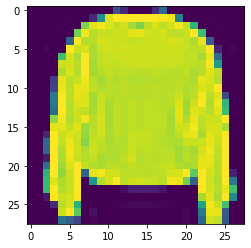

In [13]:
plt.imshow(X_train[7])

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [17]:
X_train[7].min()

0

In [18]:
X_train[7].max()

255

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[7].min()

0.0

In [21]:
X_train[7].max()

1.0

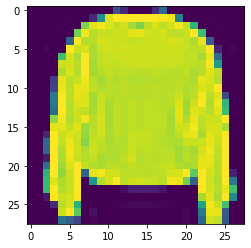

In [22]:
plt.imshow(X_train[7])

**Reshape the X into 4 dimension**

In [23]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [25]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train) 
Y_test = to_categorical(y_test)
Y_test.shape

(10000, 10)

In [30]:
Y_train[7].reshape(-1,1)

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3840 - accuracy: 0.8626 - val_loss: 0.3264 - val_accuracy: 0.8845
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2641 - accuracy: 0.9056 - val_loss: 0.2734 - val_accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2263 - accuracy: 0.9195 - val_loss: 0.2907 - val_accuracy: 0.8961
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2000 - accuracy: 0.9286 - val_loss: 0.2566 - val_accuracy: 0.9118
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1845 - accuracy: 0.9345 - val_loss: 0.2717 - val_accuracy: 0.9083
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1699 - accuracy: 0.9403 - val_loss: 0.2919 - val_accuracy: 0.9051


**Plot values of metrics you used in your model.**

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.384034,0.862650,0.326434,0.8845
1,0.264124,0.905567,0.273370,0.9010
2,0.226261,0.919533,0.290683,0.8961
3,0.199951,0.928633,0.256616,0.9118
4,0.184525,0.934483,0.271725,0.9083


**Plot values of metrics you used in your model.**

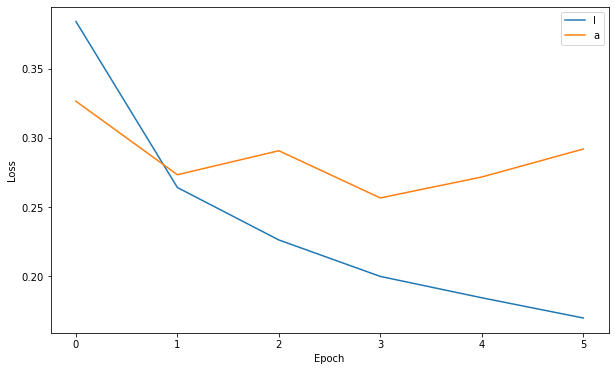

In [41]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

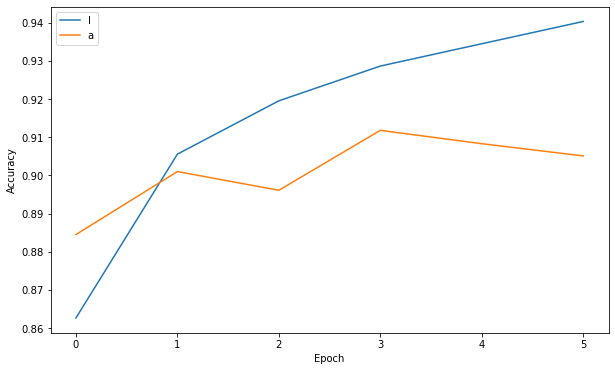

In [39]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [40]:
model.metrics_names

['loss', 'accuracy']

In [42]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 6ms/step - loss: 0.2919 - accuracy: 0.9051
[0.29190319776535034, 0.9050999879837036]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
preds = model.predict(X_test)
preds

array([[1.9022897e-07, 6.7138667e-13, 5.3967128e-08, ..., 8.0186073e-05,
        6.9117596e-07, 9.9990582e-01],
       [9.4483551e-07, 8.4928956e-17, 9.9999845e-01, ..., 1.6797905e-12,
        2.5933835e-11, 6.1965380e-14],
       [3.7811558e-09, 1.0000000e+00, 2.5755870e-11, ..., 4.0980487e-15,
        1.2802801e-13, 9.2595864e-13],
       ...,
       [3.2097523e-07, 1.1369398e-15, 3.9873523e-08, ..., 1.7507278e-09,
        9.9999857e-01, 2.4567577e-11],
       [6.7853184e-10, 1.0000000e+00, 4.2665673e-11, ..., 1.2923880e-13,
        1.7329106e-12, 2.5870122e-09],
       [2.6167920e-04, 5.8460785e-07, 1.1554778e-02, ..., 4.7994867e-02,
        3.7203997e-02, 6.5976456e-03]], dtype=float32)

In [45]:
preds[0]

array([1.9022897e-07, 6.7138667e-13, 5.3967128e-08, 1.6885780e-08,
       7.3982150e-08, 1.2562019e-05, 4.1910226e-07, 8.0186073e-05,
       6.9117596e-07, 9.9990582e-01], dtype=float32)

In [46]:
predictions= np.argmax(preds, axis=1)

In [47]:
len(predictions)

10000

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.86      0.86      1000
           3       0.92      0.90      0.91      1000
           4       0.79      0.92      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.86      0.58      0.70      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



# Prediction

In [51]:
my_number = X_test[4]

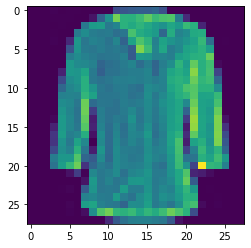

In [52]:
plt.imshow(my_number.reshape(28,28));

In [53]:
model.predict(my_number.reshape(1,28,28,1))

array([[6.3493125e-02, 5.0427209e-09, 2.8591424e-03, 7.8543970e-05,
        2.8093311e-03, 6.7774742e-08, 9.3075931e-01, 1.6727943e-08,
        1.9074774e-07, 2.1957946e-07]], dtype=float32)

In [54]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([6], dtype=int64)

In [55]:
model.save("cnn-1.h5")

# End of Assignment